# Linear Regression on Walmart_Sales Data
- Loading Data
- Checking Data
- LinearRegression

In [47]:
import pandas as pd
df = pd.read_csv("../data/Walmart_Sales.csv")

print(f"""=====Shape====
{df.shape}""")
print(f"""=====Dtypes====
{df.dtypes}
""")

df.sample(5)

=====Shape====
(6435, 8)
=====Dtypes====
Store             int64
Date                str
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1520,11,28-10-2011,1310684.10,0,72.66,3.372,221.080184,7.197
1345,10,18-03-2011,1884734.31,0,70.12,3.892,128.512193,8.744
416,3,03-08-2012,419990.29,0,86.55,3.417,225.463633,6.334
2956,21,09-12-2011,897747.13,0,41.44,3.158,218.605037,7.441
4022,29,11-06-2010,540716.58,0,65.01,2.830,132.435742,10.160


In [48]:
print(f'''====ISNULL==== 
      {df.isnull().sum()}''')
print(f'''====DUPLICATED==== 
      {df.duplicated().sum()}''')
print(f'''====ISNA==== 
      {df.isna().sum()}''')

====ISNULL==== 
      Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
====DUPLICATED==== 
      0
====ISNA==== 
      Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [49]:
print(f'''====Describe====
{df.describe(include='all')}''')
print(f'''====Corr====
{df.corr(numeric_only=True)}''')

====Describe====
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.000000  

In [50]:
# Data convert
#df[['Store','Weekly_Sales','Holiday_Flag','DayOfWeek']].select_dtypes(include=['category']).columns.to_list()
#df[['Store','Weekly_Sales','Holiday_Flag','DayOfWeek']].select_dtypes(include=['int64', 'float64']).columns.to_list()
def data_preparation(raw):
    return ( raw
           .assign(
            Date=lambda df: pd.to_datetime(df['Date'], format='%d-%m-%Y'),
            Store=lambda df: df['Store'].astype('category'),
            Year=lambda df: df['Date'].dt.year.astype('category'),
            Month=lambda df: df['Date'].dt.month.astype('category'),
            Day =lambda df: df['Date'].dt.day.astype('category'),
            DayOfWeek =lambda df: df['Date'].dt.dayofweek.astype('category'),
            WeekNumber =lambda df: df['Date'].dt.isocalendar().week.astype('category')
            )
    )

def data_preparation_with_select_column(raw, column):
    return ( raw
           .assign(
            Date=lambda df: pd.to_datetime(df['Date'], format='%d-%m-%Y'),
            Store=lambda df: df['Store'].astype('category'),
            Year=lambda df: df['Date'].dt.year.astype('category'),
            Month=lambda df: df['Date'].dt.month.astype('category'),
            Day =lambda df: df['Date'].dt.day.astype('category'),
            DayOfWeek =lambda df: df['Date'].dt.dayofweek.astype('category'),
            WeekNumber =lambda df: df['Date'].dt.isocalendar().week.astype('category')
            )[column]
    )

data = data_preparation(df)
print(data.dtypes)
data.head()

Store                 category
Date            datetime64[us]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                  category
Month                 category
Day                   category
DayOfWeek             category
WeekNumber            category
dtype: object


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek,WeekNumber
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,4,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,4,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,4,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,4,9


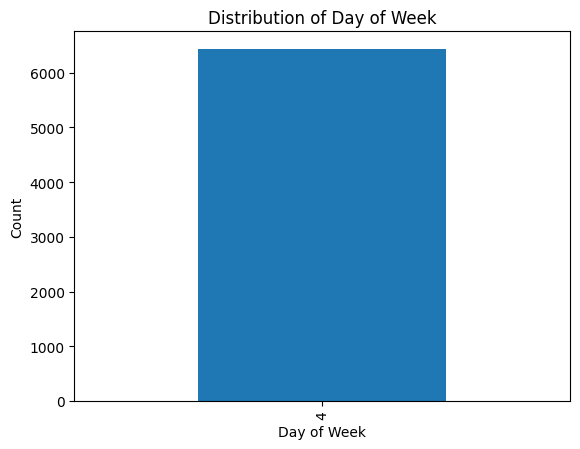

In [51]:
# plotting histogram of DayOfWeek
# Weekely sales seems to be caluculated each Wedness Day
import matplotlib.pyplot as plt
data['DayOfWeek'].value_counts().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Day of Week')
plt.show()

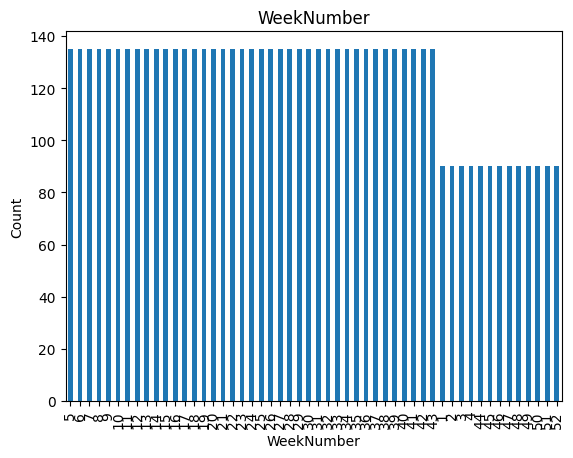

In [52]:
# plotting histogram of DayOfWeek
import matplotlib.pyplot as plt
data['WeekNumber'].value_counts().plot(kind='bar')
plt.xlabel('WeekNumber')
plt.ylabel('Count')
plt.title('WeekNumber')
plt.show()

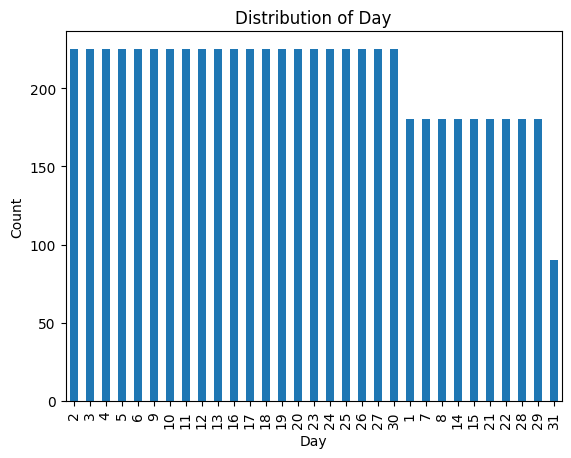

In [53]:
import matplotlib.pyplot as plt
data['Day'].value_counts().plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Day')
plt.show()

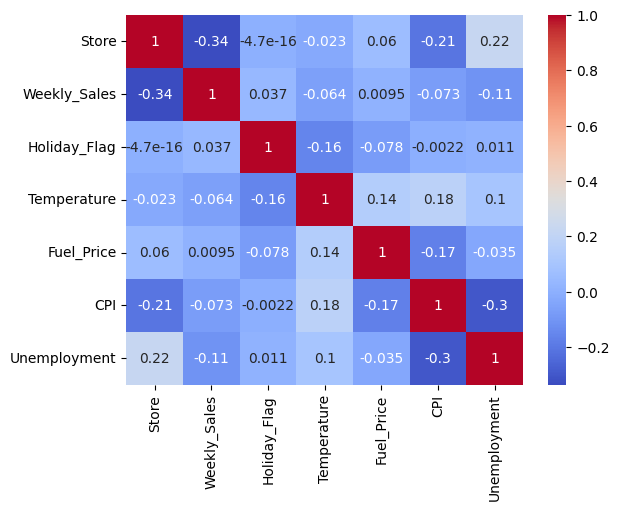

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
#sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [55]:
# LinearRegression Pipeline (including none-normalize, normalize, normalized including target )

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

def LinearRegressionAnalysis(data, target,print_result=True):
    separator=' '
    #1. Prepare Features (X) and Target (y)
    # We drop 'Date' because it's datetime64; the other category columns replace it.
    #X = data.drop(columns=['Weekly_Sales', 'Date']) 
    X = data
    #print(type(X))
    y = target
    #print(type(y))

    # Define which columns are which
    #categorical_cols = ['Store', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekNumber']
    #numerical_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
    categorical_cols = data.select_dtypes(include=['category']).columns.to_list()
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
    #print(f'''targeted categorical columns {categorical_cols}''')
    #print(f'''targeted numerical columns {numerical_cols}''')

    #--- PROCESS 1: None Normalized ---
    # Only transforms categories to numbers; keeps numerical values as they are.
    preprocessor_simple = ColumnTransformer(
        transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
        ],
        remainder='passthrough' # Keeps numerical columns unchanged
    )

    model_none_normalized = Pipeline(steps=[
        ('preprocessor', preprocessor_simple),
        ('regressor', LinearRegression())
    ])

    # --- PROCESS 2: Normalized Process ---
    # Transforms categories AND scales numerical features to a similar range (Mean=0, Std=1).
    preprocessor_scaled = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols),
            ('num', StandardScaler(), numerical_cols)
        ]
    )
    
    model_normalized = Pipeline(steps=[
        ('preprocessor', preprocessor_scaled),
        ('regressor', LinearRegression())
    ])
    
    model_with_target_norm = TransformedTargetRegressor(
        regressor=model_none_normalized,
        transformer=StandardScaler() # This scales 'Weekly_Sales'
    )
    
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # None Normalized Data
    model_none_normalized.fit(X_train, Y_train)
    # Normalized Data
    model_normalized.fit(X_train, Y_train)
    # Normalized including Target 
    model_with_target_norm.fit(X_train, Y_train)
    
    # Test and validate Model Performance
    test_predictions = model_none_normalized.predict(X_test)
    mae = mean_absolute_error(Y_test, test_predictions)
    #print(f"Model Test MAE: {test_mae}")
    squared_error = (Y_test.values.flatten() - test_predictions.flatten()) ** 2
    mean_squared_error = np.mean(squared_error)
    
    test_normalized_predictions = model_normalized.predict(X_test)
    normalized_mae = mean_absolute_error(Y_test, test_normalized_predictions)
    #print(f"Model Test MAE: {test_mae}")
    normalized_squared_error = (Y_test.values.flatten() - test_normalized_predictions.flatten()) ** 2
    normalized_mean_squared_error = np.mean(normalized_squared_error)
    
    test_normalized_with_target_predictions = model_with_target_norm.predict(X_test)
    normalized_with_target_mae = mean_absolute_error(Y_test, test_normalized_with_target_predictions)
    #print(f"Model Test MAE: {test_mae}")
    normalized_with_target_squared_error = (Y_test.values.flatten() - test_normalized_with_target_predictions.flatten()) ** 2
    normalized_with_target_mean_squared_error = np.mean(normalized_with_target_squared_error)
    
    #print(mean_squared_error)
    #results.append({separator.join(target):test_mae,'mae': test_mae, 'mse': mean_squared_error})i
    if (print_result):
        print(f'''Included features: {separator.join(data.columns.to_list())}''')
        print(f'''None Normalized mae: {mae}''')
        print(f'''None Normalized mse: {mean_squared_error}''')
    
        print(f'''Normalized mae: {normalized_mae}''')
        print(f'''Normalized mse: {normalized_mean_squared_error}''')
    
        print(f'''Normalized including Target mae: {normalized_with_target_mae}''')
        print(f'''Normalized including Target mse: {normalized_with_target_mean_squared_error}''')

    return {
            'features': separator.join(data.columns.to_list()),
            'none_normalized_mae': mae, 'none_normalized_mse': mean_squared_error, 
            'normalized_mae': normalized_mae, 'normalized_mse': normalized_mean_squared_error,
            'normalized_with_target_mae': normalized_with_target_mae, 'normalized_with_target_mse': normalized_with_target_mean_squared_error
            }

LinearRegressionAnalysis(df[['Store']], df['Weekly_Sales'])

Included features: Store
None Normalized mae: 438015.6999769419
None Normalized mse: 281257019572.3005
Normalized mae: 438015.6999769418
Normalized mse: 281257019572.3004
Normalized including Target mae: 438015.6999769419
Normalized including Target mse: 281257019572.3004


{'features': 'Store',
 'none_normalized_mae': 438015.6999769419,
 'none_normalized_mse': np.float64(281257019572.3005),
 'normalized_mae': 438015.6999769418,
 'normalized_mse': np.float64(281257019572.3004),
 'normalized_with_target_mae': 438015.6999769419,
 'normalized_with_target_mse': np.float64(281257019572.3004)}

In [56]:
# Loop future combination
from itertools import combinations
import numpy as np

results = []
separator=' '

feature_list = ['Store','Year', 'Month', 'Day', 'WeekNumber', 'Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
all_targeted_feature_combination = []
for r in range(len(features_list) + 1):
    all_targeted_feature_combination.extend(list(combinations(feature_list, r)))
#print(all_targets)

for targets in all_targeted_feature_combination:
    if not targets:
        continue
    target = list(targets)
    
    X = data_preparation_with_select_column(df,target)
    Y = df['Weekly_Sales']

    results.append(LinearRegressionAnalysis(X,Y,False))


In [57]:
#print(results)
print("=============Result Max and Min with mae and mse combination=============")
print("==None Normalized==")
max_mae = max(results, key=lambda x:x['none_normalized_mae'])
print(f"max: {max_mae['none_normalized_mae']}")
print(f"included features: {max_mae['features']}")
min_mae = min(results, key=lambda x:x['none_normalized_mae'])
print(f"min: {min_mae['none_normalized_mae']}")
print(f"included features: {min_mae['features']}")
max_mse = max(results, key=lambda x:x['none_normalized_mse'])
print(f"max mse: {max_mse['none_normalized_mse']}")
print(f"included features: {max_mse['features']}")
min_mse = min(results, key=lambda x:x['none_normalized_mse'])
print(f"min mse: {min_mse['none_normalized_mse']}")
print(f"included features: {min_mse['features']}")

print("==Normalized==")
max_mae = max(results, key=lambda x:x['normalized_mae'])
print(f"max mae: {max_mae['normalized_mae']}")
print(f"included features: {max_mae['features']}")
min_mae = min(results, key=lambda x:x['normalized_mae'])
print(f"min mae: {min_mae['normalized_mae']}")
print(f"included features: {min_mae['features']}")
max_mse = max(results, key=lambda x:x['normalized_mse'])
print(f"max mse: {max_mse['normalized_mse']}")
print(f"included features: {max_mse['features']}")
min_mse = min(results, key=lambda x:x['normalized_mse'])
print(f"min mse: {min_mse['normalized_mse']}")
print(f"included features: {min_mse['features']}")

print("==Normalized with Target==")
max_mae = max(results, key=lambda x:x['normalized_with_target_mae'])
print(f"max mae: {max_mae['normalized_with_target_mae']}")
print(f"included features: {min_mae['features']}")
min_mae = min(results, key=lambda x:x['normalized_with_target_mae'])
print(f"min mae: {min_mae['normalized_with_target_mae']}")
print(f"included features: {min_mae['features']}")
max_mse = max(results, key=lambda x:x['normalized_with_target_mse'])
print(f"max mse: {max_mse['normalized_with_target_mse']}")
print(f"included features: {max_mse['features']}")
min_mse = min(results, key=lambda x:x['normalized_with_target_mse'])
print(f"min mse: {min_mse['normalized_with_target_mse']}")
print(f"included features: {min_mse['features']}")
print("=====================================")

=============Result Max and Min with mae and mse combination=============
==None Normalized==
max: 475889.65329539165
included features: Day Holiday_Flag Unemployment
min: 71117.42246575914
included features: Store Month Day WeekNumber Holiday_Flag Temperature Fuel_Price CPI Unemployment
max mse: 322420642046.65875
included features: Day
min mse: 12428633024.593212
included features: Store Year Month Day WeekNumber Holiday_Flag Temperature CPI Unemployment
==Normalized==
max mae: 475889.6777839807
included features: Day Holiday_Flag Unemployment
min mae: 71140.25259717918
included features: Store Year Month Day WeekNumber Holiday_Flag Temperature CPI Unemployment
max mse: 322420642046.65875
included features: Day
min mse: 12424140494.604874
included features: Store Year Month Day WeekNumber Holiday_Flag Temperature CPI Unemployment
==Normalized with Target==
max mae: 475889.6532945586
included features: Store Year Month Day WeekNumber Holiday_Flag Temperature CPI Unemployment
min mae: 

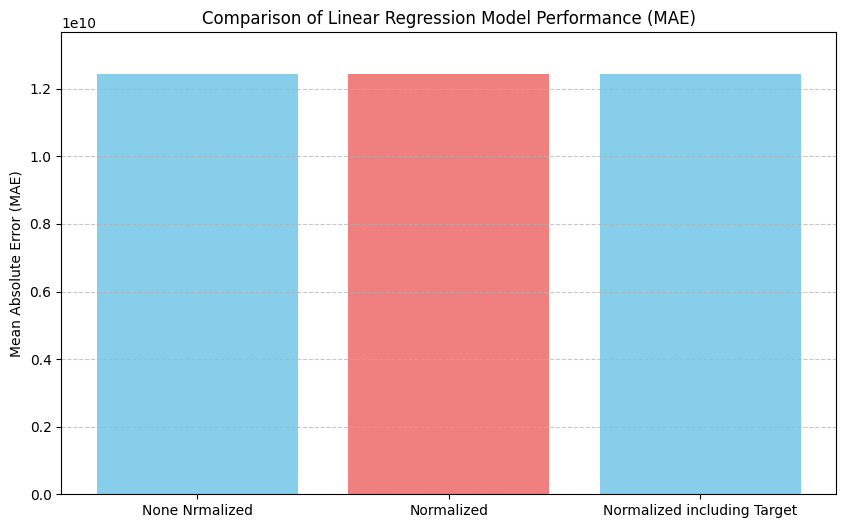

In [59]:
import matplotlib.pyplot as plt
import numpy as np

models_names = ['None Nrmalized', 'Normalized', 'Normalized including Target']
none_min_mse = min(results, key=lambda x:x['none_normalized_mse'])['none_normalized_mse']
nor_min_mse = min(results, key=lambda x:x['normalized_mse'])['normalized_mse']
nor_with_target_min_mse = min(results, key=lambda x:x['normalized_with_target_mse'])['normalized_with_target_mse']

mae_values = [none_min_mse, nor_min_mse, nor_with_target_min_mse]

plt.figure(figsize=(10, 6))
plt.bar(models_names, mae_values, color=['skyblue', 'lightcoral'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Linear Regression Model Performance (MAE)')
plt.ylim(0, max(mae_values) * 1.1) # Set y-limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [60]:
# Without Pipeline
from itertools import combinations
import numpy as np

results = []
separator=' '

#my_list = ['Store','Year', 'Month', 'Day', 'DayyOfWeek', 'Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
my_list = ['Store','Year', 'Month', 'Day', 'WeekNumber', 'Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
all_targets = []
for r in range(len(my_list) + 1):
    all_targets.extend(list(combinations(my_list, r)))
#print(all_targets)

print("=============No Normalization=============")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#targets = [['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],]

for targets in all_targets:
    if not targets:
        continue
    target = list(targets)

    X = data[target]
    Y = data['Weekly_Sales']

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.3, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, Y_train)

    #print(f"Model Coefficients: {model.coef_}, Intercept: {model.intercept_}")

    # test mae for model
    test_predictions = model.predict(X_test)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    #print(f"Model Test MAE: {test_mae}")
    squared_error = (Y_test.values.flatten() - test_predictions.flatten()) ** 2
    mean_squared_error = np.mean(squared_error)
    #print(mean_squared_error)
    results.append({separator.join(target):test_mae,'mae': test_mae, 'mse': mean_squared_error})

#print(results)
print("=============Information=============")
max_mae = max(results, key=lambda x:x['mae'])
print(f"max: {max_mae}")
min_mae = min(results, key=lambda x:x['mae'])
print(f"min: {min_mae}")
max_mse = max(results, key=lambda x:x['mse'])
print(f"max mse: {max_mse}")
min_mse = min(results, key=lambda x:x['mse'])
print(f"min mse: {min_mse}")
print("=====================================")


=============No Normalization=============
=============Information=============
max: {'Holiday_Flag Temperature Unemployment': 473069.8172779972, 'mae': 473069.8172779972, 'mse': np.float64(316505855788.8487)}
min: {'Store Year Temperature Fuel_Price CPI Unemployment': 429480.3311238515, 'mae': 429480.3311238515, 'mse': np.float64(271148597852.66852)}
max mse: {'Day Holiday_Flag': 472044.37980990653, 'mae': 472044.37980990653, 'mse': np.float64(320347049194.12494)}
min mse: {'Store Year Month Temperature Fuel_Price CPI Unemployment': 429871.21239244373, 'mae': 429871.21239244373, 'mse': np.float64(269490886033.00745)}


In [61]:
# Normalize all the numeric columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] = scaler.fit_transform(
    data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
)
y_scaler = MinMaxScaler()
scaled_weekly_sales = y_scaler.fit_transform(data[['Weekly_Sales']])
data['scaeled_weekly_sales'] = scaled_weekly_sales
#print(df['scaeled_weekly_sales'])
#df.head()


In [62]:
from itertools import combinations
import numpy as np

#my_list = ['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
my_list = ['Store','Year', 'Month', 'Day', 'WeekNumber', 'Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
all_targets = []
for r in range(len(my_list) + 1):
    all_targets.extend(list(combinations(my_list, r)))
#print(all_targets)

# Normalize all the numeric columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] = scaler.fit_transform(
    data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
)
y_scaler = MinMaxScaler()
scaled_weekly_sales = y_scaler.fit_transform(data[['Weekly_Sales']])
data['scaeled_weekly_sales'] = scaled_weekly_sales
#print(df['scaeled_weekly_sales'])
#df.head()

print("=============Normalization=============")
results = []
separator=' '

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#targets = [['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],]
Y_test_original = None
test_predictions_original = None

for targets in all_targets:
    if not targets:
        continue
    target = list(targets)

    X = data[target]
    #Y = df['Weekly_Sales']
    Y = data['scaeled_weekly_sales']

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.3, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, Y_train)

    #print(f"Model Coefficients: {model.coef_}, Intercept: {model.intercept_}")

    # test mae for model
    test_predictions = model.predict(X_test)
    test_mae = mean_absolute_error(Y_test, test_predictions)
   
    squared_error = (Y_test.values.flatten() - test_predictions.flatten()) ** 2
    mean_squared_error = np.mean(squared_error)
    
    
    Y_test_original = y_scaler.inverse_transform(Y_test.values.reshape(-1, 1))
    test_predictions_original = y_scaler.inverse_transform(test_predictions.reshape(-1, 1))
    
    original_squared_error = (Y_test_original.flatten() - test_predictions_original.flatten()) ** 2
    original_mean_squared_error = np.mean(original_squared_error)

    results.append({separator.join(target):test_mae, 'mae': test_mae, 'mse': mean_squared_error, 'original_mse': original_mean_squared_error})

#print(results)
print("=============Information=============")
max_mae = max(results, key=lambda x:x['mae'])
print(f"max: {max_mae}")
min_mae = min(results, key=lambda x:x['mae'])
print(f"min: {min_mae}")
max_mse = max(results, key=lambda x:x['mse'])
print(f"max mse: {max_mse}")
min_mse = min(results, key=lambda x:x['mse'])
print(f"min mse: {min_mse}")
max_mse = max(results, key=lambda x:x['original_mse'])
print(f"max original mse: {max_mse}")
min_mse = min(results, key=lambda x:x['original_mse'])
print(f"min original mse: {min_mse}")
print("=====================================")

=============Normalization=============
=============Information=============
max: {'Holiday_Flag Temperature Unemployment': 0.13109147090633833, 'mae': 0.13109147090633833, 'mse': np.float64(0.024304133503379673), 'original_mse': np.float64(316505855788.8487)}
min: {'Store Year Temperature Fuel_Price CPI Unemployment': 0.11901247189330152, 'mae': 0.11901247189330152, 'mse': np.float64(0.020821199990251955), 'original_mse': np.float64(271148597852.66852)}
max mse: {'Day Holiday_Flag': 0.13080731389376887, 'mae': 0.13080731389376887, 'mse': np.float64(0.024599094483174037), 'original_mse': np.float64(320347049194.12494)}
min mse: {'Store Year Month Temperature Fuel_Price CPI Unemployment': 0.11912078825291286, 'mae': 0.11912078825291286, 'mse': np.float64(0.020693906138848285), 'original_mse': np.float64(269490886033.0074)}
max original mse: {'Day Holiday_Flag': 0.13080731389376887, 'mae': 0.13080731389376887, 'mse': np.float64(0.024599094483174037), 'original_mse': np.float64(320347049